<a href="https://colab.research.google.com/github/SADUDDIN/Test_Stock_Price_Prediction/blob/main/Tesla_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##downloading

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rpaguirre/tesla-stock-price")

print("Path to dataset files:", path)

100%|██████████| 33.7k/33.7k [00:00<00:00, 8.28MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rpaguirre/tesla-stock-price/versions/1


In [ ]:
path


'/root/.cache/kagglehub/datasets/rpaguirre/tesla-stock-price/versions/1'

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r /root/.cache/kagglehub/datasets/rpaguirre/tesla-stock-price/versions/1 /content/drive/MyDrive/


##EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/1/Tesla.csv - Tesla.csv.csv')

In [7]:
df = dataset

In [8]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000


In [9]:

df.tail(2)

,Date,Open,High,Low,Close,Volume,Adj Close
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [11]:

# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'Date' column to datetime
df = df.sort_values('Date')  # Now sort the DataFrame by the 'Date' column


In [12]:
#after converiting into datatime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [13]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [14]:
df.iloc[:,1:].describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [15]:
df = df.sort_values('Date')

In [16]:
df.iloc[:3,:]

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999


In [17]:
print(f'stock prices are from {df["Date"].min()} to {df["Date"].max()}')
print(f'Total Days are {(df["Date"].max() - df["Date"].min()).days} days')


stock prices are from 2010-06-29 00:00:00 to 2017-03-17 00:00:00
Total Days are 2453 days


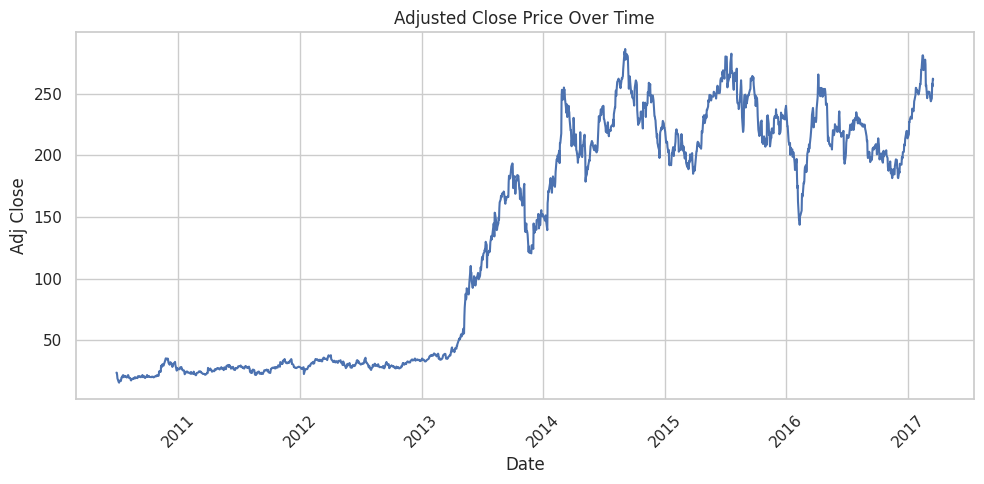

In [18]:
# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Adj Close', data=df)

# Add titles and labels
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

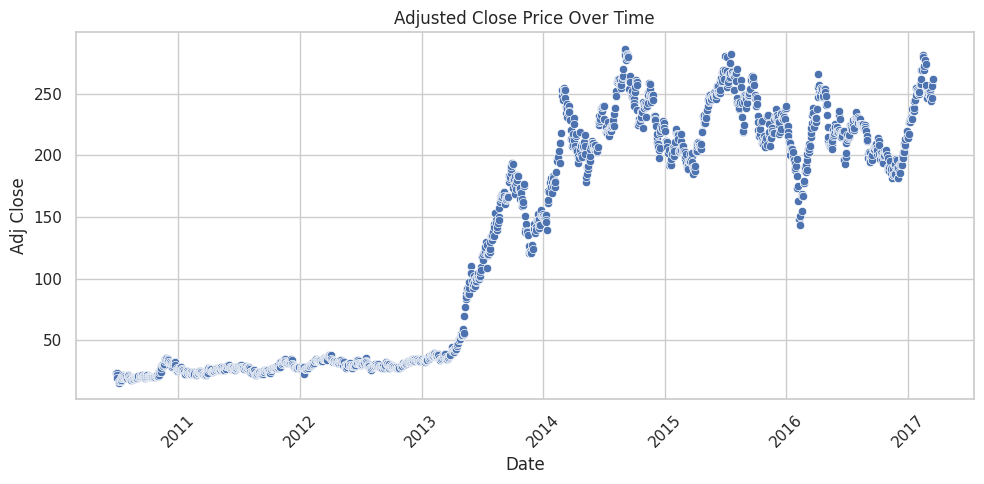

In [19]:

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Date', y='Adj Close', data=df)

# Add titles and labels
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
df_2010 = df[df['Date'].dt.year == 2010]

df_2010


,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
125,2010-12-27,28.020000,28.58,25.059999,25.549999,9301900,25.549999
126,2010-12-28,25.850000,26.75,25.000000,26.410000,4056300,26.410000
127,2010-12-29,27.030001,28.01,26.500000,27.730000,3319200,27.730000
128,2010-12-30,27.700001,27.90,26.379999,26.500000,2041100,26.500000


In [21]:
import pandas as pd

# Assuming df is the stock data DataFrame with 'Date', 'Adj Close', 'Volume' columns

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Add a new column for the year
df['Year'] = df['Date'].dt.year

# 1. Calculate Annual Returns: percentage change of 'Adj Close' within each year
annual_returns = df.groupby('Year')['Adj Close'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# 2. Calculate Yearly Volatility: standard deviation of daily returns within each year
df['Daily Return'] = df['Adj Close'].pct_change()
yearly_volatility = df.groupby('Year')['Daily Return'].std()

# 3. Calculate Average Yearly Volume
average_yearly_volume = df.groupby('Year')['Volume'].mean()

# 4. Find the Highest and Lowest Stock Prices each Year
high_price_per_year = df.groupby('Year')['High'].max()
low_price_per_year = df.groupby('Year')['Low'].min()

# 5. Extract Year-End Closing Prices
year_end_close = df.groupby('Year')['Close'].last()

# 6. Growth in Adjusted Close from the first year to the last
growth_in_adj_close = (df.groupby('Year')['Adj Close'].last() / df.groupby('Year')['Adj Close'].first() - 1) * 100

# Combine results into a DataFrame
financial_status = pd.DataFrame({
    'Annual Return (%)': annual_returns,
    'Yearly Volatility': yearly_volatility,
    'Avg Yearly Volume': average_yearly_volume,
    'High Price': high_price_per_year,
    'Low Price': low_price_per_year,
    'Year-End Close': year_end_close,
    'Adj Close Growth (%)': growth_in_adj_close
})

print(financial_status)


      Annual Return (%)  Yearly Volatility  Avg Yearly Volume  High Price  \
Year                                                                        
2010          11.469234           0.046013       1.579762e+06   36.419998   
2011           7.287746           0.032161       1.290615e+06   35.000000   
2012          20.619655           0.033552       1.229796e+06   39.950001   
2013         325.424176           0.042749       8.407722e+06  194.500000   
2014          48.174547           0.030438       6.913973e+06  291.420013   
2015           9.438693           0.024470       4.317792e+06  286.649994   
2016          -4.350746           0.024418       4.611444e+06  269.339996   
2017          20.512463           0.019870       5.323187e+06  287.390015   

       Low Price  Year-End Close  Adj Close Growth (%)  
Year                                                    
2010   14.980000       26.629999             11.469234  
2011   21.110001       28.559999              7.287746  
2

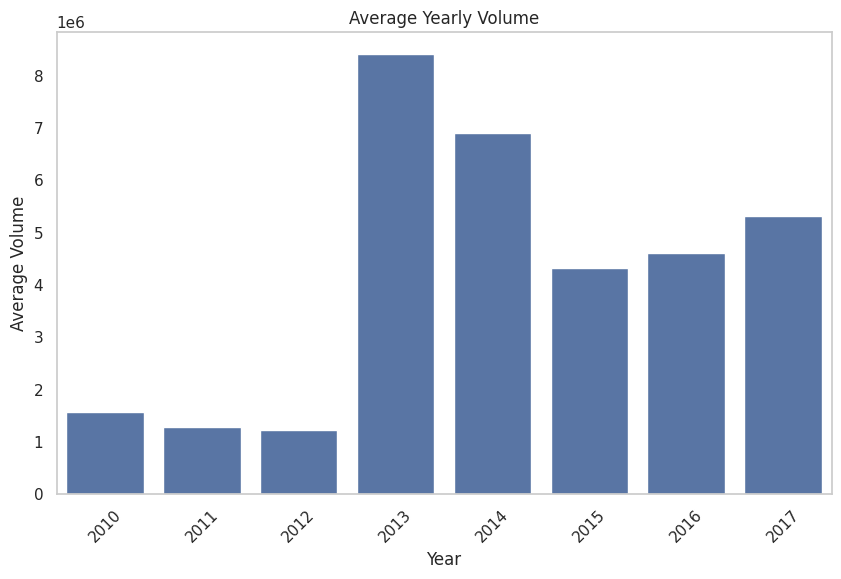

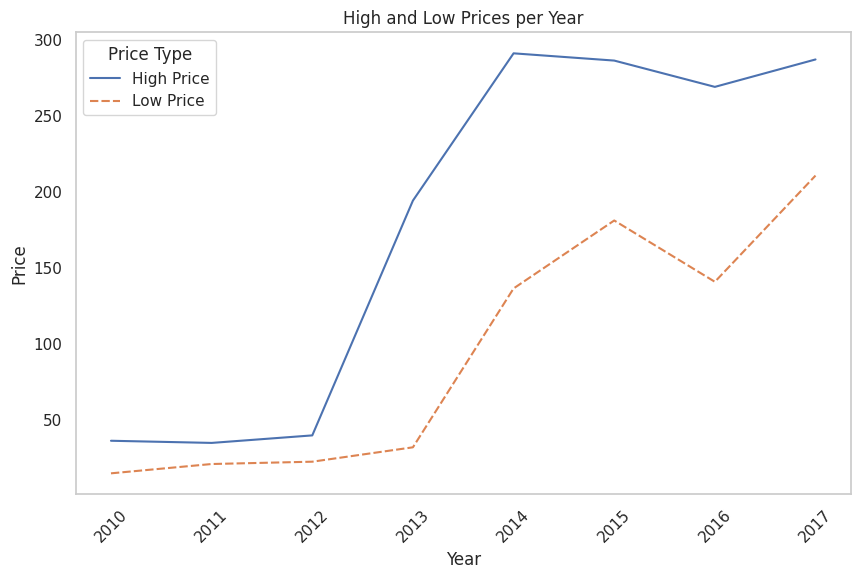

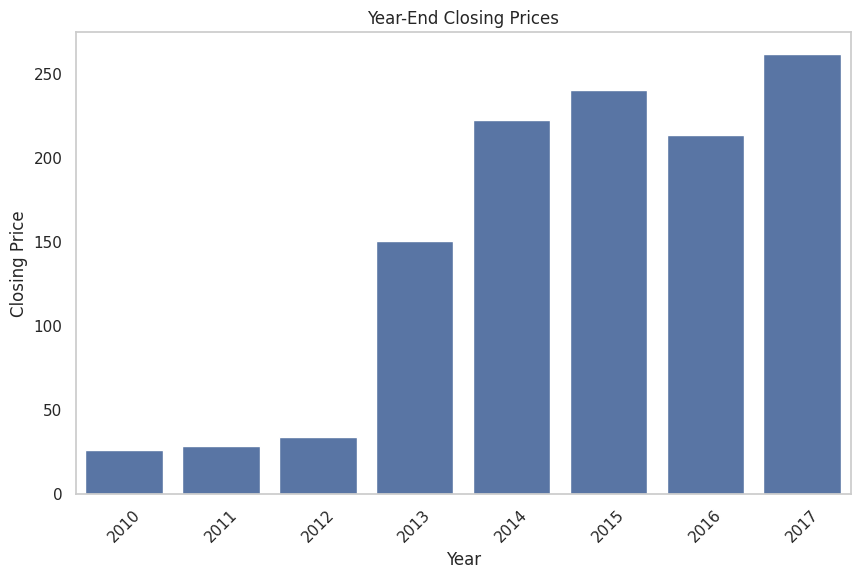

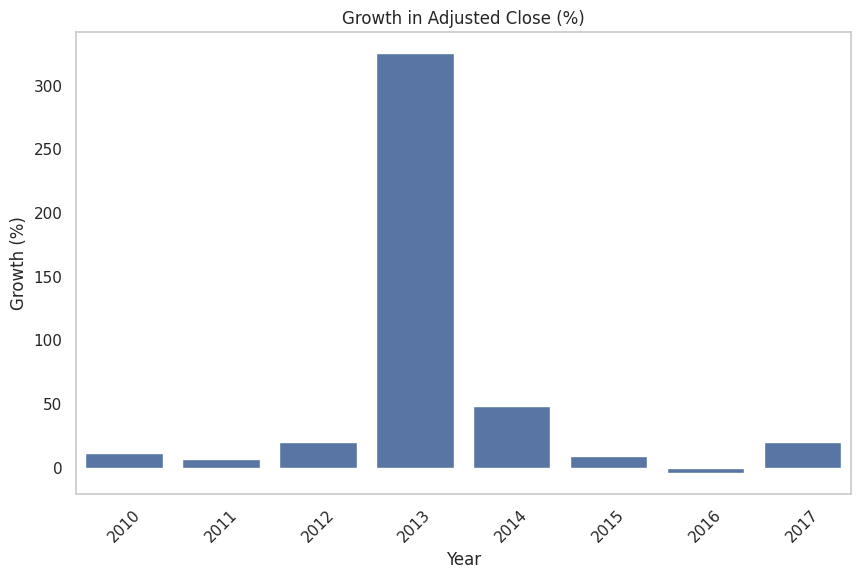

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style='whitegrid')



# 2. Average Yearly Volume
plt.figure(figsize=(10, 6))
sns.barplot(x=financial_status.index, y='Avg Yearly Volume', data=financial_status)
plt.title('Average Yearly Volume')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. High and Low Prices per Year
plt.figure(figsize=(10, 6))
sns.lineplot(data=financial_status[['High Price', 'Low Price']])
plt.title('High and Low Prices per Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Price Type')
plt.grid()
plt.show()

# 4. Year-End Close Prices
plt.figure(figsize=(10, 6))
sns.barplot(x=financial_status.index, y='Year-End Close', data=financial_status)
plt.title('Year-End Closing Prices')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 5. Adjusted Close Growth Percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=financial_status.index, y='Adj Close Growth (%)', data=financial_status)
plt.title('Growth in Adjusted Close (%)')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Machine learning model Prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgveghl78/tdzrcuop.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgveghl78/qimg5ws0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36129', 'data', 'file=/tmp/tmpgveghl78/tdzrcuop.json', 'init=/tmp/tmpgveghl78/qimg5ws0.json', 'output', 'file=/tmp/tmpgveghl78/prophet_modelqvrmgcl3/prophet_model-20250219125254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:52:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:52:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


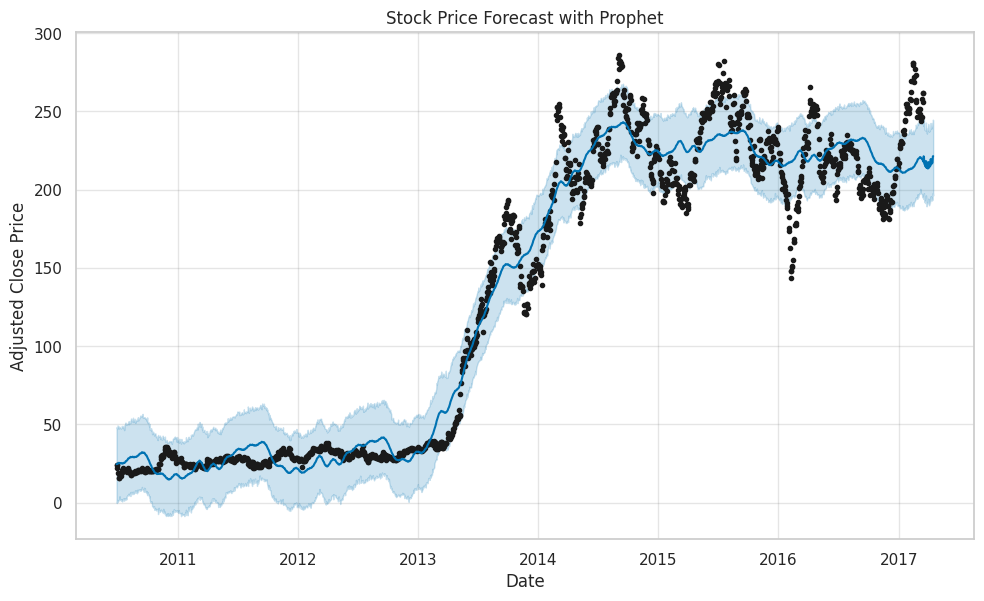

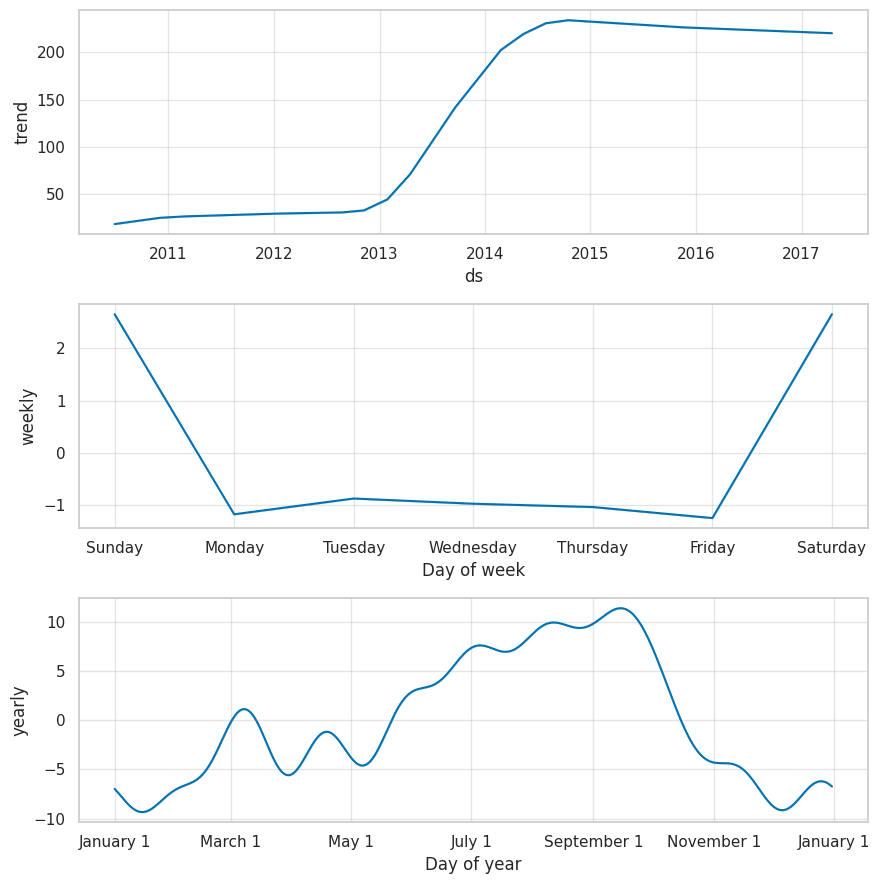

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your stock data DataFrame (df) with 'Date' and 'Adj Close'
# Assuming df is already defined

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Prepare data for Prophet
# Prophet expects the dataframe to have columns 'ds' and 'y'
prophet_data = df[['Date', 'Adj Close']].rename(columns={'Date': 'ds', 'Adj Close': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_data)

# Create a dataframe for future predictions (e.g., for the next 30 days)
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

# Plot the results
fig = model.plot(forecast)
plt.title('Stock Price Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

# Optional: Plot the components (trend, weekly, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()


##Arima Model
|

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1692
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4899.833
Date:                Wed, 19 Feb 2025   AIC                           9811.667
Time:                        12:52:56   BIC                           9844.265
Sample:                             0   HQIC                          9823.738
                               - 1692                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.018      1.746      0.081      -0.004       0.066
ar.L2          0.0002      0.020      0.010      0.992      -0.039       0.040
ar.L3         -0.0210      0.017     -1.223      0.2

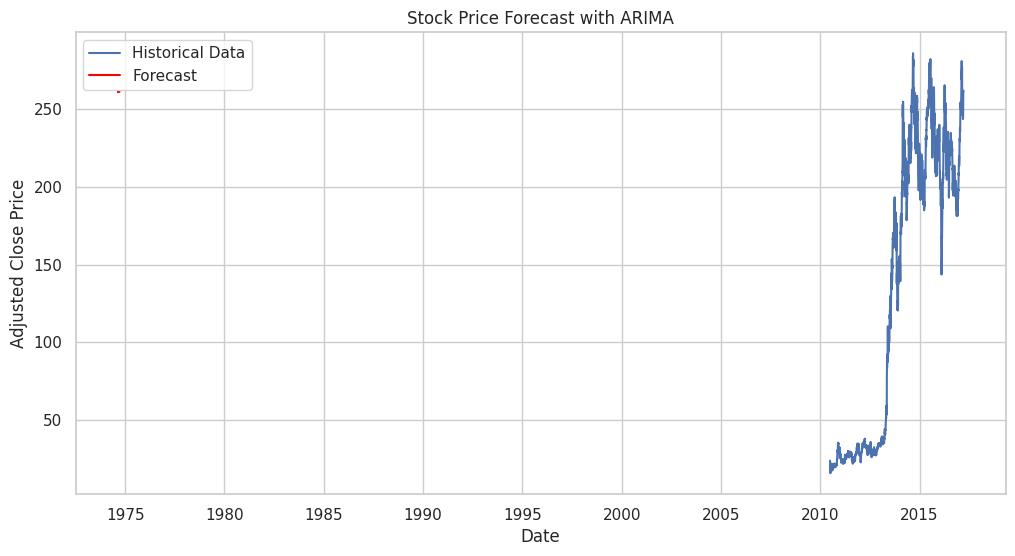

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings for better readability
warnings.filterwarnings("ignore")

# Load your stock data DataFrame (df) with 'Date' and 'Adj Close'
# Assuming df is already defined

# Convert 'Date' column to datetime and set it as index if not already
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check if data is stationary (consider applying differencing if needed)
# Here, we're using the 'Adj Close' column for ARIMA
series = df['Adj Close']

# Fit the ARIMA model
# p, d, q values need to be determined (p: autoregression order, d: differencing, q: moving average order)
model = ARIMA(series, order=(5, 1, 0))  # Example order; tune these values
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Make predictions
# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Stock Price Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -0.8137329693176635
p-value: 0.8150547908640393


<Figure size 1200x600 with 0 Axes>

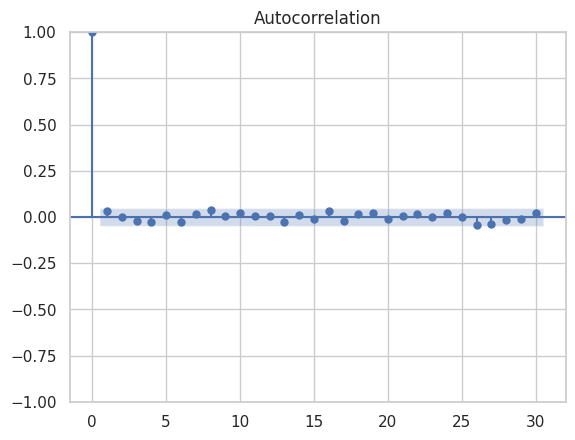

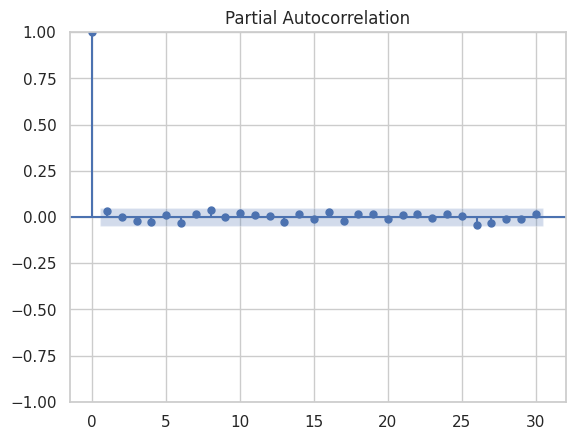

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(series.diff().dropna(), lags=30)  # Use differenced series if needed
plot_pacf(series.diff().dropna(), lags=30)
plt.show()


In [ ]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.2 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

# Auto ARIMA to find the best p, d, q
model = auto_arima(series, start_p=0, start_q=0,
                   max_p=5, max_q=5, seasonal=False,
                   stepwise=True, trace=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9805.682, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9806.104, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9806.102, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9805.414, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9808.103, Time=0.59 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.181 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1692
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4901.707
Date:                Wed, 19 Feb 2025   AIC                           9805.414
Time:                        12:53:04   BIC                           9810.847
Sample:                             0   HQIC                          9807.426
                               - 1692                                       

##LSTM Model

In [23]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt




# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Adj Close']])






In [62]:
# Create training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]



In [63]:
print(len(scaled_data))
print(len(train_data))
print(len(test_data))

1692
1353
339


In [42]:
# Function to create dataset with time steps
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [77]:
# Create datasets with time steps
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [78]:
print(X_train.shape)
print(X_test.shape)

(1292, 60)
(278, 60)


In [79]:
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)




In [80]:
print(X_train.shape)
print(X_test.shape)

(1292, 60, 1)
(278, 60, 1)


In [30]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predicting the price





/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0487
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0034
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0040
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0032
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0028
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0029
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0028
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0031
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027
Epoch 16/50

In [48]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [60]:
len(X_test)

278

In [49]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [59]:
print(df.index[train_size + time_step + 1:])
print(1692-1414)
print(len(test_predict))
print(df.index[:train_size])
print(len(df['Adj Close'][:train_size]))

RangeIndex(start=1414, stop=1692, step=1)
278
278
RangeIndex(start=0, stop=1353, step=1)
1353


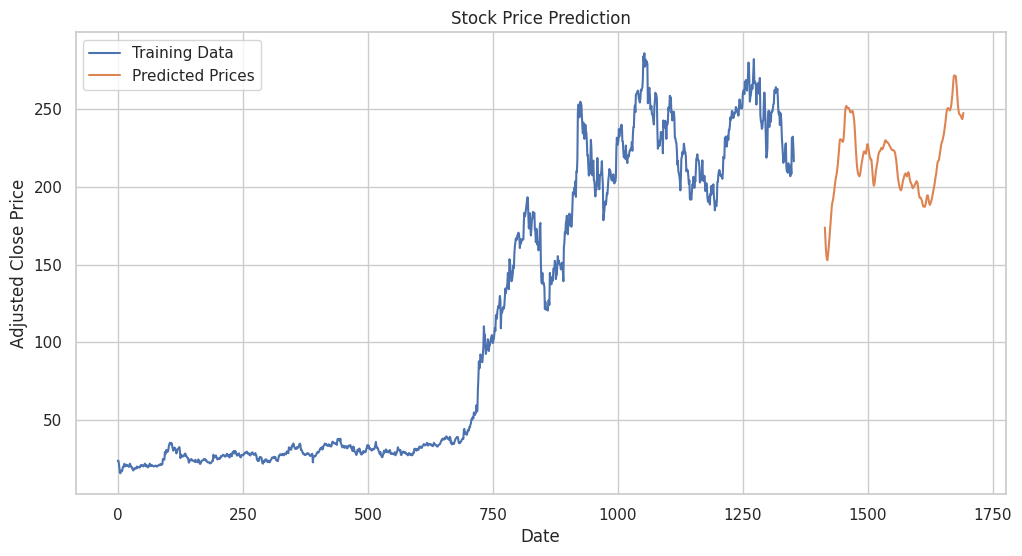

In [50]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], df['Adj Close'][:train_size], label='Training Data')
plt.plot(df.index[train_size + time_step + 1:], test_predict, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

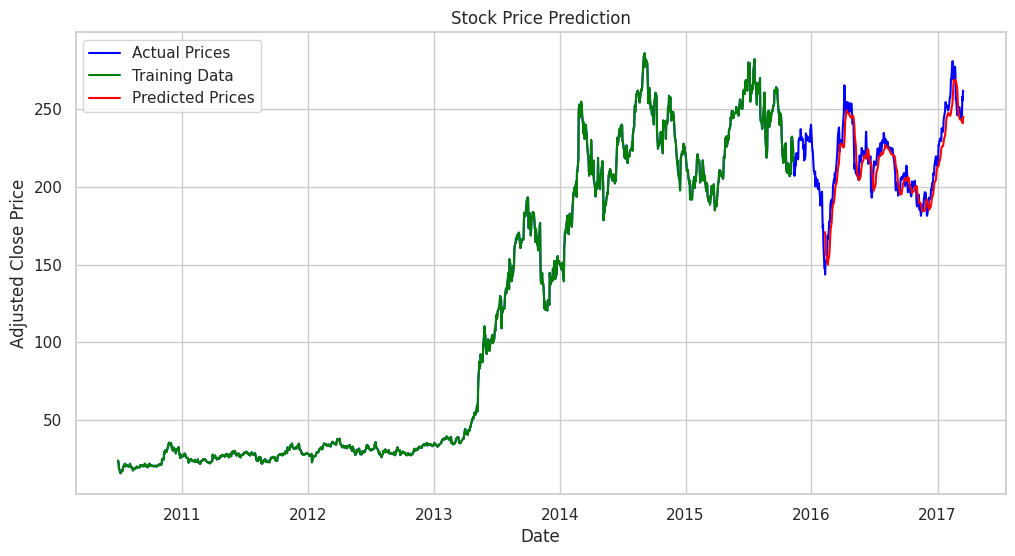

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))
# Plotting the training data

# Plotting the actual test data
plt.plot(df.index[:],df['Adj Close'], label='Actual Prices', color='blue')
plt.plot(df.index[:train_size], df['Adj Close'][:train_size], label='Training Data', color='green')
# Plotting the predicted prices
plt.plot(df.index[train_size + time_step + 1:], test_predict, label='Predicted Prices', color='red')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()
